# Imports

In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from sklearn.manifold import MDS
from skimage.transform import resize

from numba.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning, NumbaPerformanceWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPerformanceWarning)

from DataSetFactory import DataSet
from ClusterPlot import ClusterPlot

from tqdm import tqdm, tqdm_pandas
tqdm.pandas()

C:\Users\omalkai\AppData\Local\Continuum\anaconda3_new\lib\site-packages\tqdm\std.py:648: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



# Resize Fashion Mnist

In [2]:
# df = pd.read_csv('../data/FashionMNIST/train.csv')
# feature_cols = [f'Pixel{i:03}' for i in range(784)]
# df[feature_cols] = df[feature_cols] / 255
# label_col = 'Category'

In [3]:
# images = df[feature_cols].progress_apply(lambda x: resize(x.values.reshape(28,28), output_shape=(8,8)).flatten(), axis=1)

In [4]:

# resize_df = pd.DataFrame(np.array(np.stack(images.values)))
# feature_cols_resize = [f'Pixel{i:03}' for i in range(64)]
# resize_df.columns = feature_cols_resize
# resize_df[label_col] = df[label_col]

In [5]:

# resize_df.head()

In [6]:
# resize_df.to_csv('../data/FashionMNIST/train64.csv', index=False)

In [7]:
# for i in range(len(resize_df)):
#     im = resize_df[feature_cols_resize].iloc[i].values.reshape(8,8)
#     plt.imshow(im, cmap='gray')
#     plt.show()
#     if i == 10:
#         break


# Load Fashion MNIST

In [8]:
df_train = pd.read_csv('../data/FashionMNIST/train.csv')
feature_cols = [f'Pixel{i:03}' for i in range(784)]
label_col = 'Category'
ds = DataSet(df=df_train, feature_cols=feature_cols, label_col = label_col)

# Normalize
ds.df[ds.feature_cols] = ds.df[ds.feature_cols] / 255

# Take only sample for now
ds.df = ds.df.sample(frac=0.15)

In [9]:
# Keep Only 3 labels: 'Ankle boot', 'Sneaker', 'Sandal', 'Trouser',
PART_LABELS = True
if PART_LABELS:
    ds.df = ds.df[ds.df[ds.label_col].isin([1, 5, 7, 9])]
    ds.df[ds.label_col] = ds.df[ds.label_col].replace({1: 0, 5: 1, 7: 2, 9: 3})

In [10]:
show_images = False
if show_images:
    for i in range(len(ds.df)):
        im = ds.df[ds.feature_cols].iloc[i].values.reshape(28,28)
        plt.imshow(im, cmap='gray')
        plt.show()

In [11]:
classes = [
    'T-shirt/top',  # 0
    'Trouser',      # 1
    'Pullover',     # 2
    'Dress',        # 3
    'Coat',         # 4
    'Sandal',       # 5
    'Shirt',        # 6
    'Sneaker',      # 7
    'Bag',          # 8
    'Ankle boot']   # 9

if PART_LABELS:
    classes = [
        'Trouser',      # 1
        'Sandal',       # 5
        'Sneaker',      # 7
        'Ankle boot'
    ]

In [12]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values

# Original Unsupervised UMAP

## Unsupervised

In [13]:
umap_result = UMAP(n_neighbors=5).fit_transform(X)

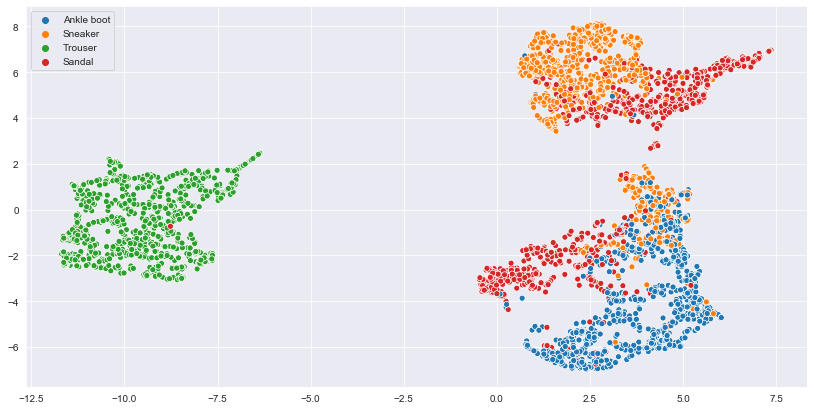

In [14]:
_, ax = plt.subplots(figsize=(14,7))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=[f'{classes[i]}' for i in y], ax=ax)

## Supervised

In [15]:
umap_result_sup = UMAP().fit_transform(X, y)

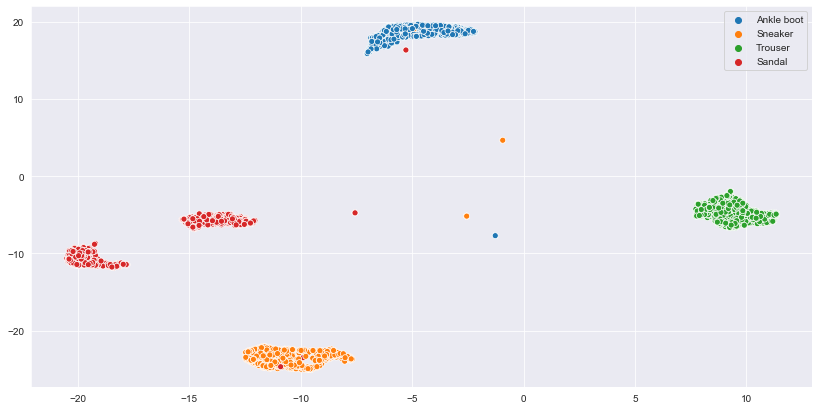

In [16]:
_, ax = plt.subplots(figsize=(14,7))
sns.scatterplot(x=umap_result_sup[:, 0], y=umap_result_sup[:, 1], hue=[f'{classes[i]}' for i in y], ax=ax)

# ClusterPlot

## Choose radius for birch using MDS

In [17]:
mds_result = MDS(n_components=2).fit_transform(X)
_, ax = plt.subplots(figsize=(14,7))
sns.scatterplot(x=mds_result[:, 0], y=mds_result[:, 1], hue=[f'{classes[i]}' for i in y], ax=ax)

KeyboardInterrupt: 

In [ ]:
n_iter = 1
batch_size = 0
amap = ClusterPlot(learning_rate=0.1, n_iter=n_iter, batch_size=batch_size, 
            anchors_method='birch', birch_threshold=3.5,
            umap_n_neighbors=5,
            dataset='FashionMNIST',
            class_to_label = {0: 'Trouser', 1: 'Sandal', 2: 'Sneaker', 3: 'Ankle boot'},
            radius_q = None,
            alpha=1,
            save_fig = False,
            is_plotly=False,
            uniform_points_per='label')
print(amap)
low_dim = amap.fit_transform(X, y)

In [ ]:
n_iter = 1
batch_size = 0
amap = ClusterPlot(learning_rate=0.1, n_iter=n_iter, batch_size=batch_size, 
            anchors_method='birch', birch_threshold=3.5,
            umap_n_neighbors=5,
            dataset='FashionMNIST',
            class_to_label = {0: 'Trouser', 1: 'Sandal', 2: 'Sneaker', 3: 'Ankle boot'},
            radius_q = None,
            alpha=1,
            save_fig = False,
            is_plotly=False,
            uniform_points_per='anchor')
print(amap)
low_dim = amap.fit_transform(X, y)

In [ ]:
amap.alpha

In [ ]:
amap.low_dim_anchors.shape

In [ ]:
amap.anchors_radius

In [ ]:
amap.anchors_density

In [ ]:
X.shape

In [ ]:
amap.anchors_radius.mean()

In [ ]:
np.median(amap.anchors_radius)